In [721]:
%pip install scikit-learn -q
%pip install pandas -q
%pip install numpy -q
%pip install matplotlib -q
%pip install seaborn -q
%pip install keras -q
%pip install os -q

%pip install cvxopt -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Note: you may need to restart the kernel to use updated packages.


In [722]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random
import seaborn as sns
import os
import cvxEDA

In [723]:
MAIN_PATH = os.path.dirname(os.getcwd())
DATA_PATH = MAIN_PATH + "/data/"

QUALITY_THRESHOLD = 64
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1024
NUM_FOLDS = 5

**Choice options of metrics are as follows:**
- w_eda
- cvx_phasic
- cvx_tonic

In [724]:
METRIC = "w_eda"

**MODEL CONFIGURATION**

- adjust if necessary. This defines the model's performance

In [725]:
dataset = pd.read_csv(DATA_PATH + "/merged_data.csv")

# IMPORTANT : UNCOMMIT THE FOLLOWING LINE WHEN CONVERTING TO PYTHON FILE. GITHUB ACTIONS ONLY ACCEPT RELATIVE PATHS!
# dataset = pd.read_csv("data/merged_data.csv")

In [726]:
import cvxEDA.src.cvxEDA

def calculate_eda_levels(y):
    fs_dict = {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4, 'label': 700, 'Resp': 700}
    Fs = fs_dict['EDA']
    yn = (y - y.mean()) / y.std()
    [r, p, t, l, d, e, obj] = cvxEDA.src.cvxEDA.cvxEDA(yn, 1. / Fs)
    return r, t, yn


     pcost       dcost       gap    pres   dres
 0: -1.2092e+04 -1.2037e+04  5e+04  2e+02  2e-01
 1: -1.2089e+04 -2.0310e+04  1e+04  4e+01  5e-02
 2: -1.2096e+04 -1.5177e+04  3e+03  1e+01  1e-02
 3: -1.2097e+04 -1.3431e+04  1e+03  4e+00  4e-03
 4: -1.2096e+04 -1.2680e+04  6e+02  1e+00  2e-03
 5: -1.2091e+04 -1.2408e+04  3e+02  5e-01  6e-04
 6: -1.2091e+04 -1.2262e+04  2e+02  2e-01  3e-04
 7: -1.2109e+04 -1.2156e+04  5e+01  3e-02  4e-05
 8: -1.2129e+04 -1.2144e+04  1e+01  9e-03  1e-05
 9: -1.2136e+04 -1.2142e+04  6e+00  3e-03  3e-06
10: -1.2139e+04 -1.2142e+04  3e+00  8e-04  1e-06
11: -1.2140e+04 -1.2141e+04  1e+00  2e-04  2e-07
12: -1.2141e+04 -1.2141e+04  4e-01  4e-05  5e-08
13: -1.2141e+04 -1.2141e+04  1e-01  8e-06  1e-08
14: -1.2141e+04 -1.2141e+04  3e-02  5e-07  6e-10
15: -1.2141e+04 -1.2141e+04  9e-03  5e-08  7e-11
16: -1.2141e+04 -1.2141e+04  3e-03  1e-08  1e-11
17: -1.2141e+04 -1.2141e+04  7e-04  2e-09  2e-12
18: -1.2141e+04 -1.2141e+04  1e-04  2e-10  2e-13
19: -1.2141e+04 -1.21

C:\Users\goert\AppData\Local\Temp\ipykernel_32480\986750774.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_dataframe_eda = pd.concat([new_dataframe_eda, temp_df], ignore_index=True)


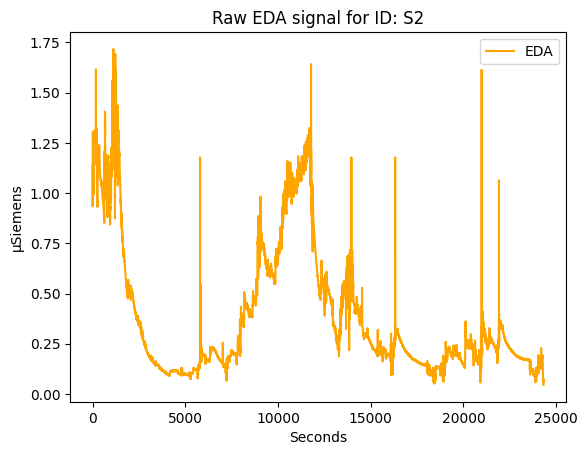

     pcost       dcost       gap    pres   dres
 0: -1.2965e+04 -1.2924e+04  5e+04  2e+02  1e-01
 1: -1.2950e+04 -1.7515e+04  5e+03  2e+01  2e-02
 2: -1.2952e+04 -1.3636e+04  7e+02  3e+00  2e-03
 3: -1.2950e+04 -1.3146e+04  2e+02  7e-01  4e-04
 4: -1.2956e+04 -1.3006e+04  5e+01  1e-01  7e-05
 5: -1.2973e+04 -1.2984e+04  1e+01  1e-02  8e-06
 6: -1.2978e+04 -1.2983e+04  5e+00  3e-03  2e-06
 7: -1.2981e+04 -1.2983e+04  2e+00  1e-03  7e-07
 8: -1.2982e+04 -1.2983e+04  8e-01  3e-04  2e-07
 9: -1.2983e+04 -1.2983e+04  3e-01  7e-05  5e-08
10: -1.2983e+04 -1.2983e+04  1e-01  2e-05  1e-08
11: -1.2983e+04 -1.2983e+04  4e-02  4e-06  3e-09
12: -1.2983e+04 -1.2983e+04  1e-02  7e-07  5e-10
13: -1.2983e+04 -1.2983e+04  3e-03  1e-07  9e-11
14: -1.2983e+04 -1.2983e+04  9e-04  2e-08  1e-11
15: -1.2983e+04 -1.2983e+04  3e-04  3e-09  2e-12
16: -1.2983e+04 -1.2983e+04  6e-05  2e-10  2e-13
17: -1.2983e+04 -1.2983e+04  1e-05  2e-11  2e-14
18: -1.2983e+04 -1.2983e+04  2e-06  2e-12  8e-15
Optimal solution foun

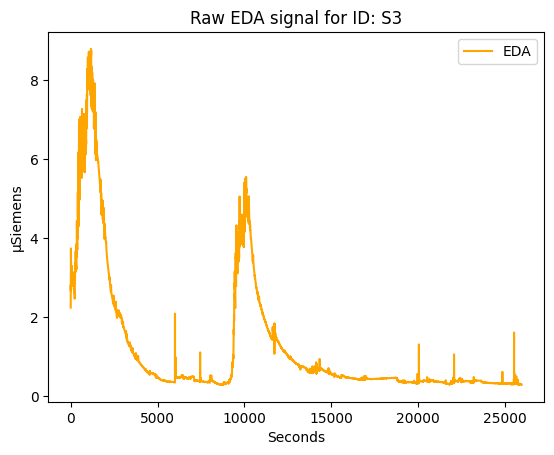

     pcost       dcost       gap    pres   dres
 0: -1.2831e+04 -1.2794e+04  4e+04  2e+02  3e-01
 1: -1.2816e+04 -1.6678e+04  4e+03  2e+01  3e-02
 2: -1.2818e+04 -1.3589e+04  8e+02  4e+00  5e-03
 3: -1.2817e+04 -1.2947e+04  1e+02  5e-01  7e-04
 4: -1.2826e+04 -1.2848e+04  2e+01  2e-02  3e-05
 5: -1.2840e+04 -1.2844e+04  5e+00  5e-03  7e-06
 6: -1.2842e+04 -1.2844e+04  2e+00  2e-03  3e-06
 7: -1.2843e+04 -1.2844e+04  9e-01  6e-04  9e-07
 8: -1.2844e+04 -1.2844e+04  4e-01  6e-05  9e-08
 9: -1.2844e+04 -1.2844e+04  9e-02  1e-05  2e-08
10: -1.2844e+04 -1.2844e+04  3e-02  2e-06  3e-09
11: -1.2844e+04 -1.2844e+04  8e-03  4e-07  6e-10
12: -1.2844e+04 -1.2844e+04  3e-03  7e-08  1e-10
13: -1.2844e+04 -1.2844e+04  7e-04  6e-09  9e-12
14: -1.2844e+04 -1.2844e+04  2e-04  6e-10  1e-12
15: -1.2844e+04 -1.2844e+04  4e-05  7e-11  1e-13
16: -1.2844e+04 -1.2844e+04  7e-06  8e-12  2e-14
Optimal solution found.


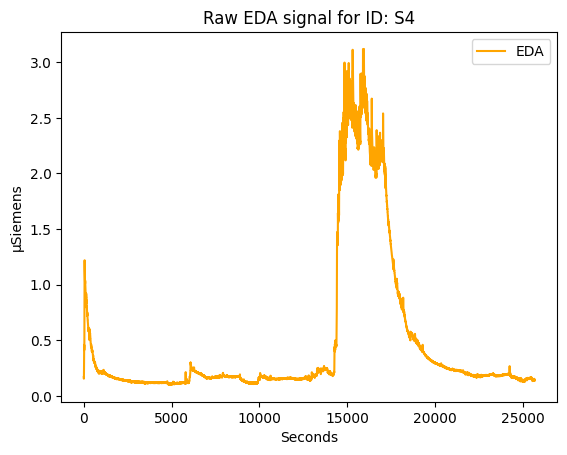

     pcost       dcost       gap    pres   dres
 0: -1.2498e+04 -1.2465e+04  4e+04  2e+02  3e-01
 1: -1.2481e+04 -1.6433e+04  4e+03  2e+01  3e-02
 2: -1.2479e+04 -1.3513e+04  1e+03  5e+00  6e-03
 3: -1.2476e+04 -1.2812e+04  3e+02  1e+00  1e-03
 4: -1.2473e+04 -1.2622e+04  1e+02  4e-01  5e-04
 5: -1.2483e+04 -1.2529e+04  5e+01  8e-02  9e-05
 6: -1.2498e+04 -1.2515e+04  2e+01  3e-02  3e-05
 7: -1.2505e+04 -1.2512e+04  7e+00  4e-03  5e-06
 8: -1.2509e+04 -1.2512e+04  3e+00  8e-04  1e-06
 9: -1.2510e+04 -1.2511e+04  1e+00  2e-04  3e-07
10: -1.2511e+04 -1.2511e+04  3e-01  4e-05  5e-08
11: -1.2511e+04 -1.2511e+04  1e-01  1e-05  2e-08
12: -1.2511e+04 -1.2511e+04  4e-02  2e-06  3e-09
13: -1.2511e+04 -1.2511e+04  1e-02  2e-07  2e-10
14: -1.2511e+04 -1.2511e+04  3e-03  1e-08  1e-11
15: -1.2511e+04 -1.2511e+04  1e-03  2e-09  2e-12
16: -1.2511e+04 -1.2511e+04  3e-04  3e-10  3e-13
17: -1.2511e+04 -1.2511e+04  8e-05  6e-11  7e-14
18: -1.2511e+04 -1.2511e+04  1e-05  4e-12  1e-14
Optimal solution foun

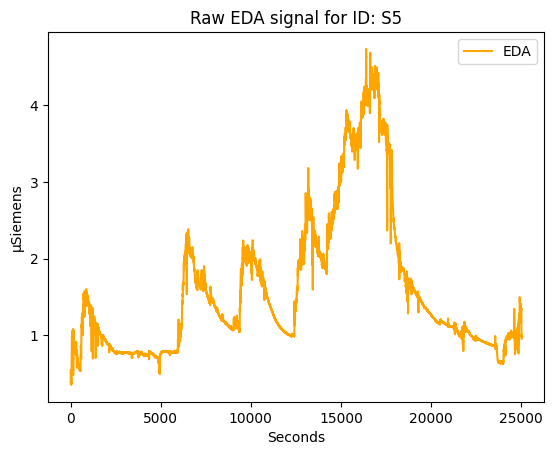

     pcost       dcost       gap    pres   dres
 0: -1.4123e+04 -1.4083e+04  4e+04  2e+02  4e-01
 1: -1.4106e+04 -1.7005e+04  3e+03  1e+01  3e-02
 2: -1.4110e+04 -1.4625e+04  5e+02  2e+00  4e-03
 3: -1.4110e+04 -1.4255e+04  1e+02  5e-01  1e-03
 4: -1.4112e+04 -1.4158e+04  5e+01  9e-02  2e-04
 5: -1.4128e+04 -1.4140e+04  1e+01  2e-02  4e-05
 6: -1.4134e+04 -1.4139e+04  5e+00  5e-03  1e-05
 7: -1.4136e+04 -1.4138e+04  2e+00  1e-03  2e-06
 8: -1.4137e+04 -1.4138e+04  7e-01  3e-04  6e-07
 9: -1.4137e+04 -1.4138e+04  2e-01  6e-05  1e-07
10: -1.4138e+04 -1.4138e+04  6e-02  1e-05  3e-08
11: -1.4138e+04 -1.4138e+04  2e-02  3e-06  5e-09
12: -1.4138e+04 -1.4138e+04  6e-03  4e-07  7e-10
13: -1.4138e+04 -1.4138e+04  2e-03  7e-08  1e-10
14: -1.4138e+04 -1.4138e+04  4e-04  6e-09  1e-11
15: -1.4138e+04 -1.4138e+04  1e-04  6e-10  1e-12
16: -1.4138e+04 -1.4138e+04  3e-05  7e-11  1e-13
17: -1.4138e+04 -1.4138e+04  4e-06  6e-12  1e-14
Optimal solution found.


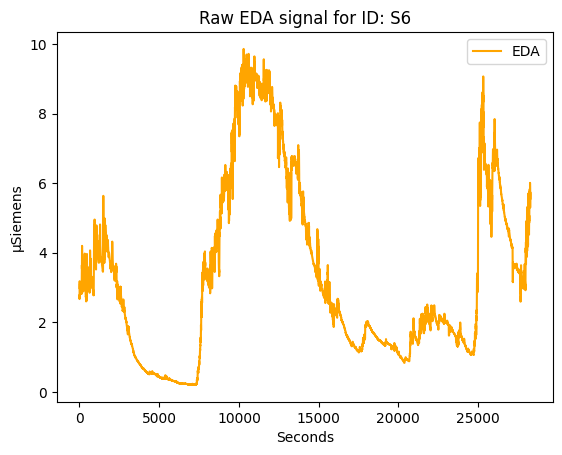

     pcost       dcost       gap    pres   dres
 0: -1.0444e+04 -1.0412e+04  3e+04  2e+02  2e-01
 1: -1.0435e+04 -1.3716e+04  4e+03  2e+01  2e-02
 2: -1.0437e+04 -1.1602e+04  1e+03  5e+00  6e-03
 3: -1.0436e+04 -1.0851e+04  4e+02  1e+00  2e-03
 4: -1.0436e+04 -1.0595e+04  2e+02  4e-01  5e-04
 5: -1.0440e+04 -1.0498e+04  6e+01  1e-01  1e-04
 6: -1.0457e+04 -1.0470e+04  1e+01  1e-02  2e-05
 7: -1.0462e+04 -1.0469e+04  6e+00  5e-03  6e-06
 8: -1.0465e+04 -1.0468e+04  3e+00  1e-03  1e-06
 9: -1.0466e+04 -1.0468e+04  1e+00  4e-04  5e-07
10: -1.0467e+04 -1.0468e+04  5e-01  9e-05  1e-07
11: -1.0467e+04 -1.0467e+04  2e-01  2e-05  2e-08
12: -1.0467e+04 -1.0467e+04  4e-02  3e-06  4e-09
13: -1.0467e+04 -1.0467e+04  1e-02  6e-07  7e-10
14: -1.0467e+04 -1.0467e+04  4e-03  1e-07  1e-10
15: -1.0467e+04 -1.0467e+04  1e-03  1e-08  2e-11
16: -1.0467e+04 -1.0467e+04  3e-04  2e-09  2e-12
17: -1.0467e+04 -1.0467e+04  5e-05  2e-10  3e-13
18: -1.0467e+04 -1.0467e+04  6e-06  1e-11  2e-14
Optimal solution foun

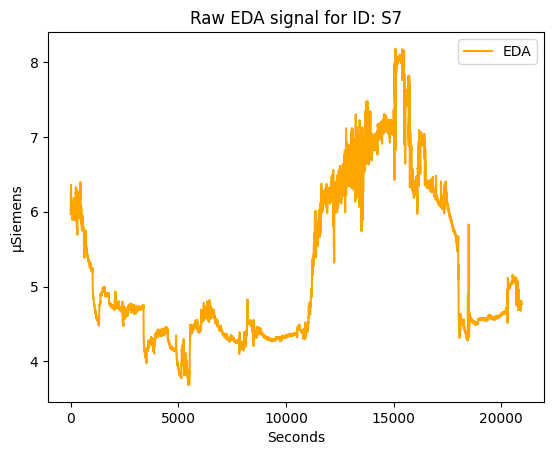

     pcost       dcost       gap    pres   dres
 0: -1.0913e+04 -1.0883e+04  3e+04  2e+02  3e-01
 1: -1.0902e+04 -1.4280e+04  4e+03  2e+01  4e-02
 2: -1.0901e+04 -1.1712e+04  8e+02  4e+00  7e-03
 3: -1.0898e+04 -1.1154e+04  3e+02  9e-01  2e-03
 4: -1.0900e+04 -1.0981e+04  8e+01  2e-01  4e-04
 5: -1.0911e+04 -1.0929e+04  2e+01  9e-03  2e-05
 6: -1.0920e+04 -1.0927e+04  8e+00  3e-03  6e-06
 7: -1.0923e+04 -1.0927e+04  4e+00  1e-03  2e-06
 8: -1.0925e+04 -1.0927e+04  1e+00  2e-04  4e-07
 9: -1.0926e+04 -1.0927e+04  4e-01  4e-05  8e-08
10: -1.0926e+04 -1.0926e+04  2e-01  1e-05  2e-08
11: -1.0926e+04 -1.0926e+04  5e-02  2e-06  4e-09
12: -1.0926e+04 -1.0926e+04  1e-02  4e-07  7e-10
13: -1.0926e+04 -1.0926e+04  4e-03  6e-08  1e-10
14: -1.0926e+04 -1.0926e+04  9e-04  9e-09  2e-11
15: -1.0926e+04 -1.0926e+04  2e-04  5e-10  1e-12
16: -1.0926e+04 -1.0926e+04  3e-05  7e-11  1e-13
17: -1.0926e+04 -1.0926e+04  2e-06  5e-12  1e-14
Optimal solution found.


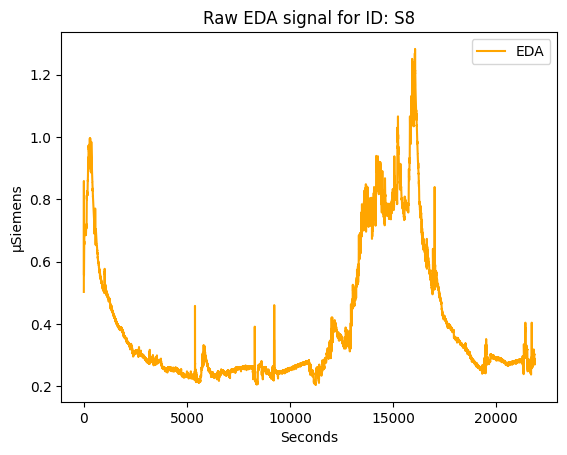

     pcost       dcost       gap    pres   dres
 0: -1.0396e+04 -1.0351e+04  5e+04  2e+02  5e-01
 1: -1.0392e+04 -1.8135e+04  1e+04  4e+01  1e-01
 2: -1.0396e+04 -1.3139e+04  3e+03  9e+00  2e-02
 3: -1.0396e+04 -1.1846e+04  1e+03  4e+00  1e-02
 4: -1.0391e+04 -1.1247e+04  9e+02  2e+00  4e-03
 5: -1.0387e+04 -1.0842e+04  5e+02  8e-01  2e-03
 6: -1.0390e+04 -1.0545e+04  2e+02  2e-01  5e-04
 7: -1.0404e+04 -1.0454e+04  5e+01  5e-02  1e-04
 8: -1.0423e+04 -1.0438e+04  2e+01  1e-02  3e-05
 9: -1.0429e+04 -1.0436e+04  7e+00  4e-03  1e-05
10: -1.0433e+04 -1.0435e+04  3e+00  9e-04  2e-06
11: -1.0434e+04 -1.0435e+04  1e+00  2e-04  6e-07
12: -1.0434e+04 -1.0435e+04  4e-01  5e-05  1e-07
13: -1.0435e+04 -1.0435e+04  1e-01  1e-05  4e-08
14: -1.0435e+04 -1.0435e+04  5e-02  4e-06  1e-08
15: -1.0435e+04 -1.0435e+04  1e-02  6e-07  2e-09
16: -1.0435e+04 -1.0435e+04  4e-03  1e-07  3e-10
17: -1.0435e+04 -1.0435e+04  1e-03  2e-08  5e-11
18: -1.0435e+04 -1.0435e+04  3e-04  4e-09  1e-11
19: -1.0435e+04 -1.04

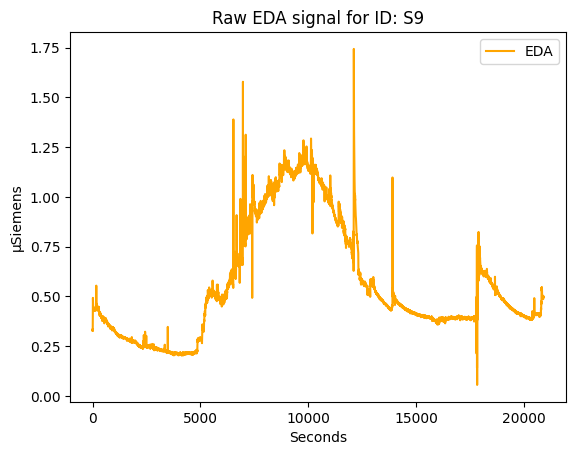

     pcost       dcost       gap    pres   dres
 0: -1.0985e+04 -1.0958e+04  3e+04  2e+02  2e-01
 1: -1.0969e+04 -1.4088e+04  3e+03  2e+01  2e-02
 2: -1.0968e+04 -1.1548e+04  6e+02  3e+00  3e-03
 3: -1.0965e+04 -1.1147e+04  2e+02  7e-01  7e-04
 4: -1.0965e+04 -1.1024e+04  6e+01  1e-01  1e-04
 5: -1.0979e+04 -1.0993e+04  1e+01  2e-02  2e-05
 6: -1.0985e+04 -1.0991e+04  6e+00  8e-03  8e-06
 7: -1.0987e+04 -1.0990e+04  3e+00  7e-04  7e-07
 8: -1.0989e+04 -1.0990e+04  1e+00  7e-05  7e-08
 9: -1.0990e+04 -1.0990e+04  3e-01  2e-05  2e-08
10: -1.0990e+04 -1.0990e+04  1e-01  7e-06  6e-09
11: -1.0990e+04 -1.0990e+04  5e-02  2e-06  1e-09
12: -1.0990e+04 -1.0990e+04  1e-02  3e-07  3e-10
13: -1.0990e+04 -1.0990e+04  4e-03  6e-08  6e-11
14: -1.0990e+04 -1.0990e+04  1e-03  1e-08  1e-11
15: -1.0990e+04 -1.0990e+04  3e-04  1e-09  1e-12
16: -1.0990e+04 -1.0990e+04  8e-05  1e-10  1e-13
17: -1.0990e+04 -1.0990e+04  2e-05  2e-11  2e-14
18: -1.0990e+04 -1.0990e+04  3e-06  2e-12  1e-14
Optimal solution foun

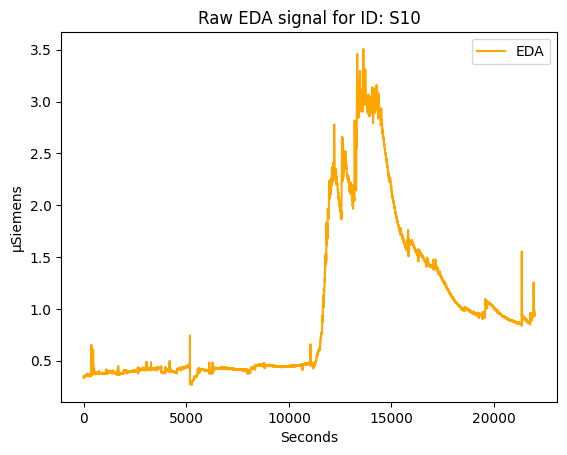

     pcost       dcost       gap    pres   dres
 0: -1.0441e+04 -1.0412e+04  3e+04  2e+02  3e-01
 1: -1.0432e+04 -1.4107e+04  4e+03  2e+01  3e-02
 2: -1.0433e+04 -1.1471e+04  1e+03  5e+00  7e-03
 3: -1.0429e+04 -1.0832e+04  4e+02  1e+00  2e-03
 4: -1.0431e+04 -1.0528e+04  1e+02  2e-01  4e-04
 5: -1.0441e+04 -1.0464e+04  2e+01  1e-02  2e-05
 6: -1.0452e+04 -1.0462e+04  1e+01  5e-03  8e-06
 7: -1.0457e+04 -1.0461e+04  4e+00  2e-03  2e-06
 8: -1.0459e+04 -1.0460e+04  2e+00  4e-04  5e-07
 9: -1.0460e+04 -1.0460e+04  7e-01  1e-04  2e-07
10: -1.0460e+04 -1.0460e+04  2e-01  3e-05  4e-08
11: -1.0460e+04 -1.0460e+04  7e-02  5e-06  7e-09
12: -1.0460e+04 -1.0460e+04  2e-02  8e-07  1e-09
13: -1.0460e+04 -1.0460e+04  7e-03  2e-07  3e-10
14: -1.0460e+04 -1.0460e+04  2e-03  3e-08  4e-11
15: -1.0460e+04 -1.0460e+04  6e-04  4e-09  6e-12
16: -1.0460e+04 -1.0460e+04  1e-04  5e-10  8e-13
17: -1.0460e+04 -1.0460e+04  2e-05  5e-11  7e-14
18: -1.0460e+04 -1.0460e+04  4e-06  5e-12  1e-14
Optimal solution foun

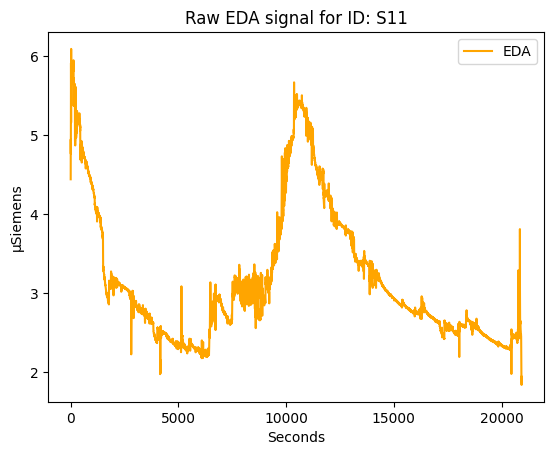

     pcost       dcost       gap    pres   dres
 0: -1.1062e+04 -1.1037e+04  3e+04  2e+02  2e-01
 1: -1.1047e+04 -1.3040e+04  2e+03  1e+01  2e-02
 2: -1.1049e+04 -1.1535e+04  5e+02  3e+00  3e-03
 3: -1.1046e+04 -1.1220e+04  2e+02  7e-01  8e-04
 4: -1.1050e+04 -1.1092e+04  4e+01  1e-01  1e-04
 5: -1.1060e+04 -1.1074e+04  1e+01  3e-02  4e-05
 6: -1.1066e+04 -1.1071e+04  5e+00  8e-03  1e-05
 7: -1.1069e+04 -1.1071e+04  2e+00  2e-03  3e-06
 8: -1.1070e+04 -1.1071e+04  7e-01  6e-04  7e-07
 9: -1.1070e+04 -1.1071e+04  3e-01  2e-04  2e-07
10: -1.1070e+04 -1.1070e+04  9e-02  2e-05  3e-08
11: -1.1070e+04 -1.1070e+04  3e-02  6e-06  7e-09
12: -1.1070e+04 -1.1070e+04  8e-03  8e-07  1e-09
13: -1.1070e+04 -1.1070e+04  2e-03  1e-07  1e-10
14: -1.1070e+04 -1.1070e+04  6e-04  6e-09  7e-12
15: -1.1070e+04 -1.1070e+04  1e-04  3e-10  4e-13
16: -1.1070e+04 -1.1070e+04  3e-05  1e-11  2e-14
17: -1.1070e+04 -1.1070e+04  7e-06  2e-12  7e-15
Optimal solution found.


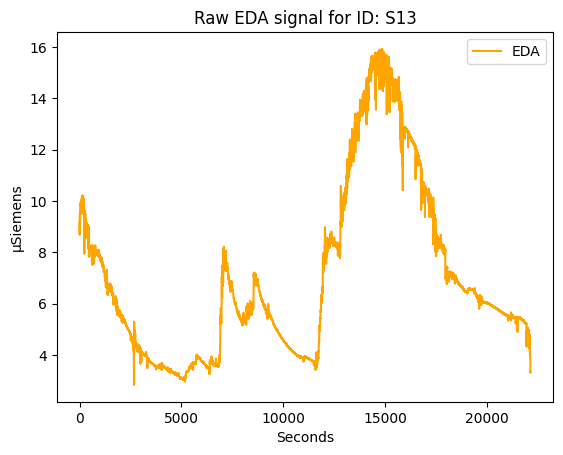

     pcost       dcost       gap    pres   dres
 0: -9.9520e+03 -9.5586e+03  3e+05  4e+02  1e+00
 1: -1.0251e+04 -8.2961e+04  9e+04  9e+01  2e-01
 2: -1.0424e+04 -5.3757e+04  5e+04  4e+01  9e-02
 3: -1.0467e+04 -5.1286e+04  4e+04  3e+01  8e-02
 4: -1.0561e+04 -3.4237e+04  2e+04  2e+01  4e-02
 5: -1.0608e+04 -3.1041e+04  2e+04  1e+01  3e-02
 6: -1.0664e+04 -2.2132e+04  1e+04  6e+00  1e-02
 7: -1.0688e+04 -1.7868e+04  7e+03  3e+00  6e-03
 8: -1.0684e+04 -1.4269e+04  4e+03  1e+00  2e-03
 9: -1.0688e+04 -1.2493e+04  2e+03  5e-01  1e-03
10: -1.0655e+04 -1.1680e+04  1e+03  2e-01  4e-04
11: -1.0716e+04 -1.0987e+04  3e+02  3e-02  7e-05
12: -1.0762e+04 -1.0886e+04  1e+02  4e-03  8e-06
13: -1.0798e+04 -1.0873e+04  8e+01  2e-03  4e-06
14: -1.0815e+04 -1.0866e+04  5e+01  3e-04  6e-07
15: -1.0840e+04 -1.0861e+04  2e+01  6e-05  1e-07
16: -1.0849e+04 -1.0859e+04  1e+01  1e-05  3e-08
17: -1.0853e+04 -1.0857e+04  5e+00  5e-06  1e-08
18: -1.0855e+04 -1.0857e+04  2e+00  1e-06  3e-09
19: -1.0856e+04 -1.08

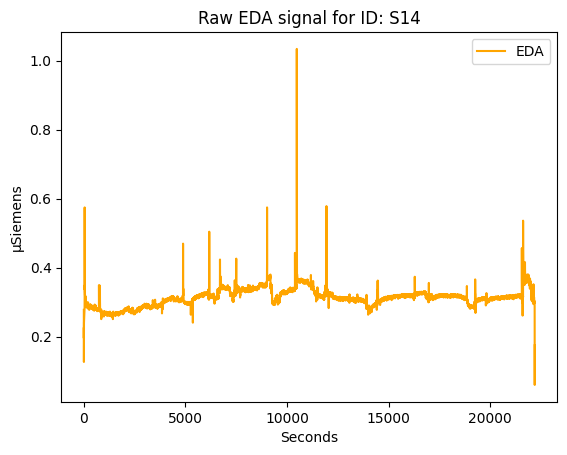

     pcost       dcost       gap    pres   dres
 0: -1.0492e+04 -1.0467e+04  3e+04  2e+02  1e-01
 1: -1.0479e+04 -1.2422e+04  2e+03  1e+01  1e-02
 2: -1.0478e+04 -1.0990e+04  5e+02  3e+00  2e-03
 3: -1.0476e+04 -1.0707e+04  2e+02  1e+00  8e-04
 4: -1.0473e+04 -1.0564e+04  9e+01  3e-01  2e-04
 5: -1.0485e+04 -1.0503e+04  2e+01  1e-02  1e-05
 6: -1.0493e+04 -1.0501e+04  8e+00  4e-03  3e-06
 7: -1.0497e+04 -1.0501e+04  3e+00  1e-03  1e-06
 8: -1.0499e+04 -1.0501e+04  1e+00  3e-04  3e-07
 9: -1.0500e+04 -1.0500e+04  5e-01  1e-04  8e-08
10: -1.0500e+04 -1.0500e+04  2e-01  3e-05  2e-08
11: -1.0500e+04 -1.0500e+04  7e-02  5e-06  4e-09
12: -1.0500e+04 -1.0500e+04  2e-02  5e-07  4e-10
13: -1.0500e+04 -1.0500e+04  5e-03  6e-08  5e-11
14: -1.0500e+04 -1.0500e+04  1e-03  6e-09  5e-12
15: -1.0500e+04 -1.0500e+04  3e-04  5e-10  4e-13
16: -1.0500e+04 -1.0500e+04  6e-05  5e-11  4e-14
17: -1.0500e+04 -1.0500e+04  8e-06  6e-12  5e-15
Optimal solution found.


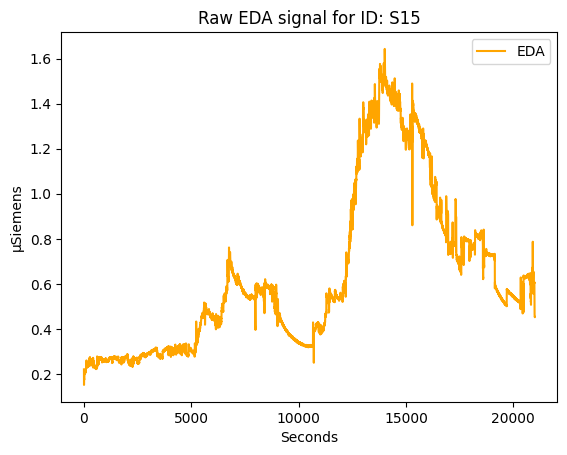

     pcost       dcost       gap    pres   dres
 0: -1.1256e+04 -1.1234e+04  3e+04  2e+02  3e-01
 1: -1.1240e+04 -1.2866e+04  2e+03  1e+01  2e-02
 2: -1.1238e+04 -1.1495e+04  3e+02  1e+00  3e-03
 3: -1.1238e+04 -1.1314e+04  8e+01  3e-01  6e-04
 4: -1.1244e+04 -1.1264e+04  2e+01  3e-02  7e-05
 5: -1.1255e+04 -1.1260e+04  6e+00  8e-03  2e-05
 6: -1.1258e+04 -1.1260e+04  2e+00  2e-03  4e-06
 7: -1.1259e+04 -1.1260e+04  8e-01  6e-04  1e-06
 8: -1.1259e+04 -1.1260e+04  3e-01  1e-04  2e-07
 9: -1.1260e+04 -1.1260e+04  1e-01  2e-05  5e-08
10: -1.1260e+04 -1.1260e+04  3e-02  1e-06  3e-09
11: -1.1260e+04 -1.1260e+04  9e-03  3e-07  6e-10
12: -1.1260e+04 -1.1260e+04  3e-03  5e-08  1e-10
13: -1.1260e+04 -1.1260e+04  6e-04  4e-09  8e-12
14: -1.1260e+04 -1.1260e+04  2e-04  6e-10  1e-12
15: -1.1260e+04 -1.1260e+04  2e-05  3e-11  7e-14
16: -1.1260e+04 -1.1260e+04  4e-06  4e-12  1e-14
Optimal solution found.


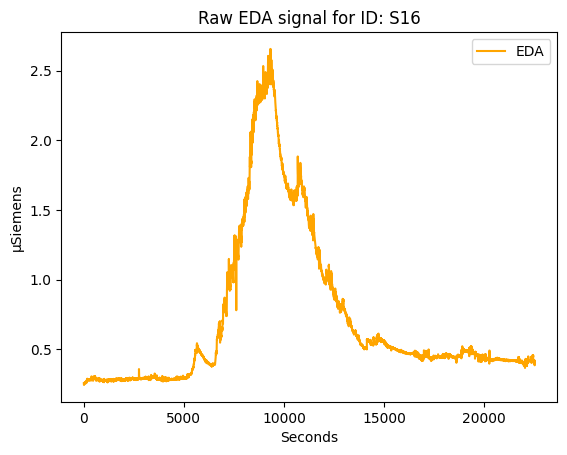

     pcost       dcost       gap    pres   dres
 0: -1.1703e+04 -1.1621e+04  5e+04  2e+02  2e-01
 1: -1.1718e+04 -2.1481e+04  1e+04  5e+01  4e-02
 2: -1.1742e+04 -1.5529e+04  4e+03  1e+01  9e-03
 3: -1.1753e+04 -1.3279e+04  2e+03  4e+00  3e-03
 4: -1.1755e+04 -1.3072e+04  1e+03  3e+00  3e-03
 5: -1.1761e+04 -1.2350e+04  6e+02  1e+00  1e-03
 6: -1.1761e+04 -1.2087e+04  3e+02  6e-01  5e-04
 7: -1.1765e+04 -1.1912e+04  1e+02  2e-01  2e-04
 8: -1.1779e+04 -1.1816e+04  4e+01  2e-02  2e-05
 9: -1.1794e+04 -1.1808e+04  1e+01  7e-03  6e-06
10: -1.1800e+04 -1.1806e+04  6e+00  1e-03  1e-06
11: -1.1803e+04 -1.1805e+04  2e+00  3e-04  2e-07
12: -1.1804e+04 -1.1805e+04  1e+00  7e-05  6e-08
13: -1.1804e+04 -1.1805e+04  3e-01  2e-05  1e-08
14: -1.1805e+04 -1.1805e+04  1e-01  5e-06  4e-09
15: -1.1805e+04 -1.1805e+04  4e-02  1e-06  9e-10
16: -1.1805e+04 -1.1805e+04  1e-02  1e-07  1e-10
17: -1.1805e+04 -1.1805e+04  3e-03  3e-08  2e-11
18: -1.1805e+04 -1.1805e+04  5e-04  3e-09  3e-12
19: -1.1805e+04 -1.18

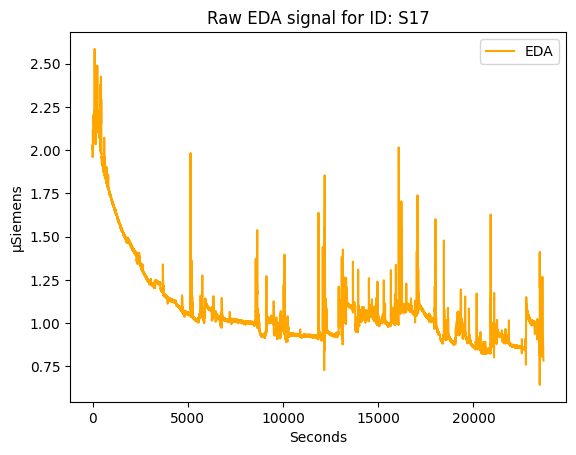

In [727]:
import matplotlib.pyplot as plt

# Define unique_ids
unique_ids = dataset['ID'].unique()

# Initialize the new DataFrame
new_dataframe_eda = pd.DataFrame(columns=["cvx_phasic", "cvx_tonic"])

# Iterate through each unique id
for unique_id in unique_ids:
    # Filter data for each id
    subset_data = dataset[dataset['ID'] == unique_id]
    
    # Calculate EDA levels
    phasic, tonic, yn = calculate_eda_levels(subset_data['w_eda'].values)
    
    # Create a temporary DataFrame to hold the new data
    temp_df = pd.DataFrame({
        "cvx_phasic": phasic, 
        "cvx_tonic": tonic
    })

    new_dataframe_eda = pd.concat([new_dataframe_eda, temp_df], ignore_index=True)

    # Plotting
    # plt.plot(tonic, label='Tonic')
    # plt.plot(phasic, label='Phasic')s
    plt.plot(subset_data['w_eda'].values, label='EDA', color='orange')

    plt.xlabel('Seconds')
    plt.ylabel('µSiemens')
    plt.title(f'Raw EDA signal for ID: {unique_id}')
    plt.legend()
    plt.show()



In [728]:
dataset = pd.concat([dataset, new_dataframe_eda], axis=1)

In [729]:
import pandas as pd

# Function to create sequences DataFrame
def create_sequences_df(merged_df, max_length=32):
    sequences = []
    temp_sequence = []
    eda_sequence = []
    label = None
    time_sequence = []
    current_id = None
    phasic_eda_sequence = []
    tonic_eda_sequence = []

    for index, row in merged_df.iterrows():
        if current_id != row['ID']:
            # New ID encountered, append previous sequence to list
            if temp_sequence:
                sequences.append({
                    'ID': current_id,
                    'w_eda': eda_sequence,
                    'w_temp': temp_sequence,
                    'downsampled_label': label,
                    'Time': time_sequence,
                    'cvx_phasic': phasic_eda_sequence,
                    'cvx_tonic': tonic_eda_sequence
                })
            # Reset sequences for new ID
            temp_sequence = [row['w_temp']]
            eda_sequence = [row['w_eda']]
            label = row['downsampled_labels']
            time_sequence = [row['Time']]
            current_id = row['ID']
            phasic_eda_sequence = [row['cvx_phasic']]
            tonic_eda_sequence = [row['cvx_tonic']]
        else:
            # Append values to sequences
            temp_sequence.append(row['w_temp'])
            eda_sequence.append(row['w_eda'])
            time_sequence.append(row['Time'])
            phasic_eda_sequence.append(row['cvx_phasic'])
            tonic_eda_sequence.append(row['cvx_tonic'])

        # Check if sequence length exceeds max_length
        if len(temp_sequence) >= max_length:
            sequences.append({
                'ID': current_id,
                'w_eda': eda_sequence,
                'w_temp': temp_sequence,
                'downsampled_label': label,
                'Time': time_sequence,
                'cvx_phasic': phasic_eda_sequence,
                'cvx_tonic': tonic_eda_sequence
            })
            # Reset sequences for new ID
            temp_sequence = []
            eda_sequence = []
            label = None
            time_sequence = []
            current_id = None
            phasic_eda_sequence = []
            tonic_eda_sequence = []

    # Append last sequence if it's not empty
    if temp_sequence:
        sequences.append({
            'ID': current_id,
            'w_eda': eda_sequence,
            'w_temp': temp_sequence,
            'downsampled_label': label,
            'Time': time_sequence,
            'cvx_phasic': phasic_eda_sequence,
            'cvx_tonic': tonic_eda_sequence
        })

    # Convert list of dictionaries to DataFrame
    sequences_df = pd.DataFrame(sequences)
    return sequences_df

# Create sequences DataFrame
sequences_df = create_sequences_df(dataset)

In [730]:
sequences_df

,ID,w_eda,w_temp,downsampled_label,Time,cvx_phasic,cvx_tonic
0,S2,"[1.138257, 1.125444, 1.011405, 1.033188, 0.935...","[35.41, 35.41, 35.41, 35.41, 35.41, 35.41, 35....",0.0,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 0.0, -0.29028704534925953, -0.4463023106...","[2.235824015415713, 2.2410226078538633, 2.2434..."
1,S2,"[1.116375, 1.109969, 1.104843, 1.099718, 1.094...","[35.45, 35.45, 35.45, 35.45, 35.41, 35.41, 35....",0.0,"[8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 1...","[0.5369178880335287, 0.5403534726202395, 0.541...","[1.6619116206256164, 1.6417932937848856, 1.622..."
2,S2,"[1.249634, 1.261166, 1.267572, 1.270135, 1.275...","[35.45, 35.45, 35.45, 35.45, 35.43, 35.43, 35....",0.0,"[16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, ...","[0.7534719745225507, 0.7671649763600733, 0.757...","[1.8486647634733069, 1.874705656805469, 1.9012..."
3,S2,"[1.299606, 1.300887, 1.300887, 1.298324, 1.299...","[35.45, 35.45, 35.45, 35.45, 35.43, 35.43, 35....",0.0,"[24.0, 24.25, 24.5, 24.75, 25.0, 25.25, 25.5, ...","[0.1489031808309924, 0.13299542956110286, 0.11...","[2.610592808693715, 2.625337313560814, 2.63934..."
4,S2,"[1.289355, 1.289355, 1.288074, 1.288074, 1.286...","[35.45, 35.45, 35.45, 35.45, 35.45, 35.45, 35....",0.0,"[32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, ...","[0.05310540340836996, 0.06695184337039853, 0.0...","[2.6721126459941202, 2.6586801486398914, 2.644..."
...,...,...,...,...,...,...,...
10859,S17,"[0.922787, 0.939419, 0.945816, 0.945816, 0.944...","[31.93, 31.91, 31.91, 31.91, 31.91, 31.93, 31....",0.0,"[5880.0, 5880.25, 5880.5, 5880.75, 5881.0, 588...","[3.167426942619043, 3.1266598265997567, 3.0487...","[-3.8061206452028054, -3.6971745332197568, -3...."
10860,S17,"[0.931742, 0.929184, 0.933022, 0.929184, 0.931...","[31.95, 31.99, 31.99, 31.99, 31.99, 31.99, 31....",0.0,"[5888.0, 5888.25, 5888.5, 5888.75, 5889.0, 588...","[0.43613866472046775, 0.3890677608522584, 0.34...","[-1.0450328296645508, -0.9987983684322405, -0...."
10861,S17,"[0.922787, 0.908713, 0.917669, 0.904875, 0.906...","[32.0, 32.0, 32.0, 32.0, 32.0, 32.05, 32.05, 3...",0.0,"[5896.0, 5896.25, 5896.5, 5896.75, 5897.0, 589...","[0.6493152200506745, 0.707028391598441, 0.7508...","[-1.3152401771469509, -1.370679900656556, -1.4..."
10862,S17,"[0.803802, 0.805081, 0.806361, 0.820434, 0.849...","[32.03, 32.03, 32.03, 32.03, 32.03, 31.99, 31....",0.0,"[5904.0, 5904.25, 5904.5, 5904.75, 5905.0, 590...","[2.4548501877040403, 2.523664729077592, 2.5108...","[-3.553667364788243, -3.6199554539875294, -3.6..."


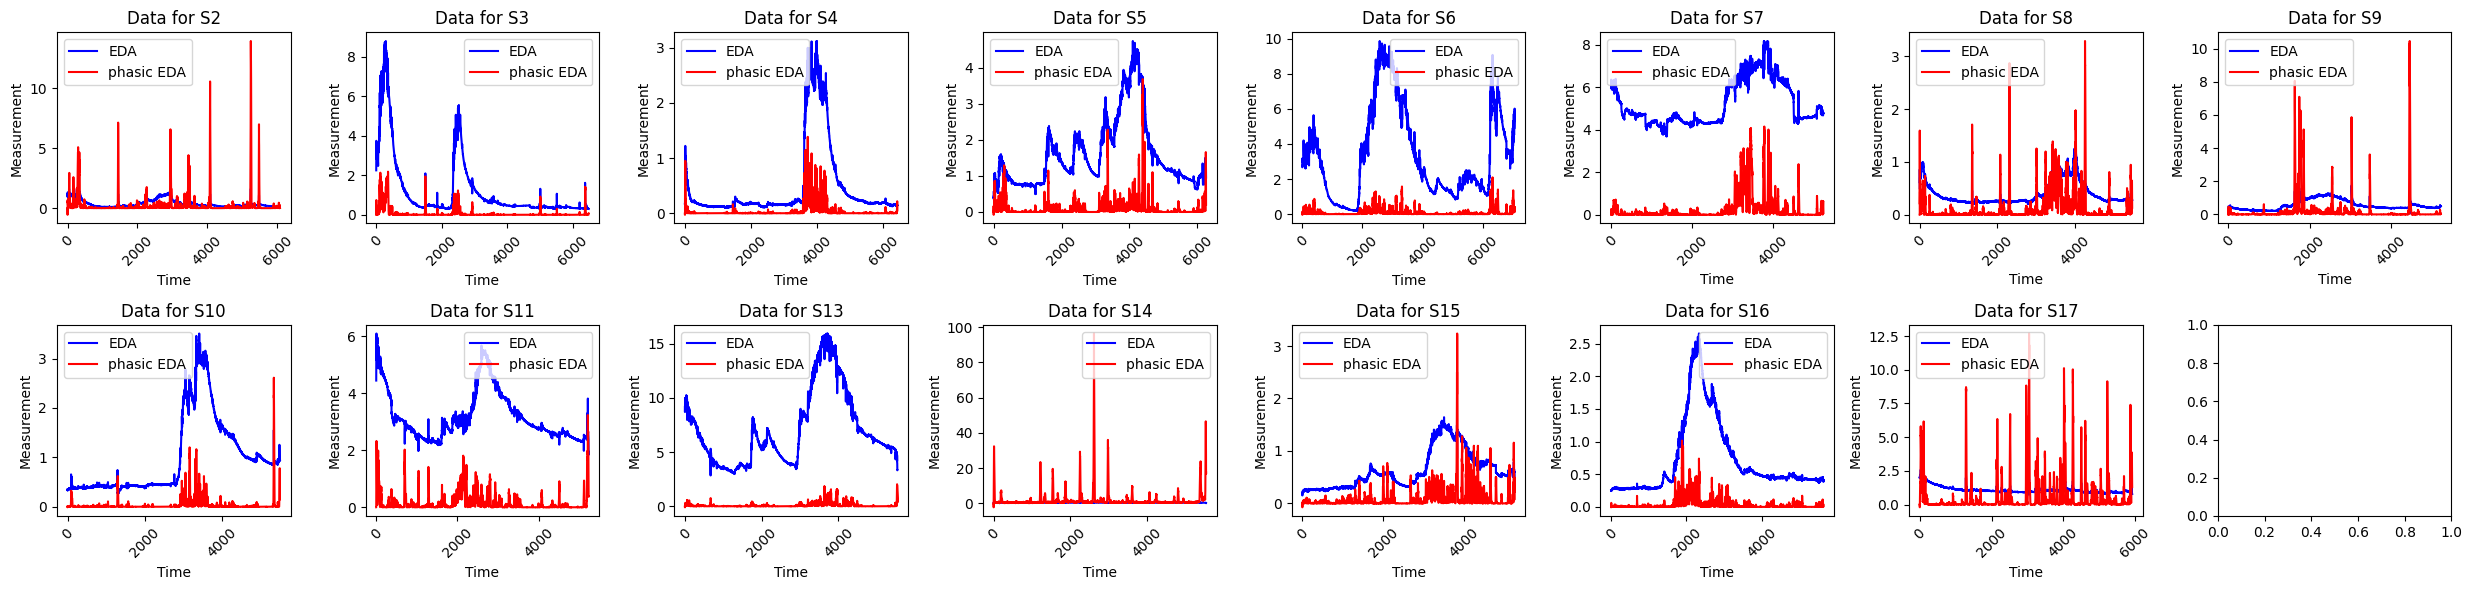

In [731]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 8, figsize=(25, 6))  # Increased figure size
axes = axes.flatten()

# Define unique_ids
unique_ids = dataset['ID'].unique()

# Iterate through each unique id
for i, unique_id in enumerate(unique_ids):
    if i < len(unique_ids):
        # Filter data for each id
        subset_data = dataset[dataset['ID'] == unique_id]
        
        # Plotting
        sns.lineplot(x='Time', y='w_eda', data=subset_data, ax=axes[i], color='blue', label='EDA')
        sns.lineplot(x='Time', y='cvx_phasic', data=subset_data, ax=axes[i], color='red', label='phasic EDA')
        # sns.lineplot(x='Time', y='cvx_tonic', data=subset_data, ax=axes[i], color='yellow', label='tonic EDA')                  
        # sns.lineplot(x='Time', y='w_temp', data=subset_data, ax=axes[i], color='red', label='Temp')

        axes[i].set_title(f"Data for {unique_id}")
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Measurement')
        axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [732]:
sequences_df

,ID,w_eda,w_temp,downsampled_label,Time,cvx_phasic,cvx_tonic
0,S2,"[1.138257, 1.125444, 1.011405, 1.033188, 0.935...","[35.41, 35.41, 35.41, 35.41, 35.41, 35.41, 35....",0.0,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 0.0, -0.29028704534925953, -0.4463023106...","[2.235824015415713, 2.2410226078538633, 2.2434..."
1,S2,"[1.116375, 1.109969, 1.104843, 1.099718, 1.094...","[35.45, 35.45, 35.45, 35.45, 35.41, 35.41, 35....",0.0,"[8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 1...","[0.5369178880335287, 0.5403534726202395, 0.541...","[1.6619116206256164, 1.6417932937848856, 1.622..."
2,S2,"[1.249634, 1.261166, 1.267572, 1.270135, 1.275...","[35.45, 35.45, 35.45, 35.45, 35.43, 35.43, 35....",0.0,"[16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, ...","[0.7534719745225507, 0.7671649763600733, 0.757...","[1.8486647634733069, 1.874705656805469, 1.9012..."
3,S2,"[1.299606, 1.300887, 1.300887, 1.298324, 1.299...","[35.45, 35.45, 35.45, 35.45, 35.43, 35.43, 35....",0.0,"[24.0, 24.25, 24.5, 24.75, 25.0, 25.25, 25.5, ...","[0.1489031808309924, 0.13299542956110286, 0.11...","[2.610592808693715, 2.625337313560814, 2.63934..."
4,S2,"[1.289355, 1.289355, 1.288074, 1.288074, 1.286...","[35.45, 35.45, 35.45, 35.45, 35.45, 35.45, 35....",0.0,"[32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, ...","[0.05310540340836996, 0.06695184337039853, 0.0...","[2.6721126459941202, 2.6586801486398914, 2.644..."
...,...,...,...,...,...,...,...
10859,S17,"[0.922787, 0.939419, 0.945816, 0.945816, 0.944...","[31.93, 31.91, 31.91, 31.91, 31.91, 31.93, 31....",0.0,"[5880.0, 5880.25, 5880.5, 5880.75, 5881.0, 588...","[3.167426942619043, 3.1266598265997567, 3.0487...","[-3.8061206452028054, -3.6971745332197568, -3...."
10860,S17,"[0.931742, 0.929184, 0.933022, 0.929184, 0.931...","[31.95, 31.99, 31.99, 31.99, 31.99, 31.99, 31....",0.0,"[5888.0, 5888.25, 5888.5, 5888.75, 5889.0, 588...","[0.43613866472046775, 0.3890677608522584, 0.34...","[-1.0450328296645508, -0.9987983684322405, -0...."
10861,S17,"[0.922787, 0.908713, 0.917669, 0.904875, 0.906...","[32.0, 32.0, 32.0, 32.0, 32.0, 32.05, 32.05, 3...",0.0,"[5896.0, 5896.25, 5896.5, 5896.75, 5897.0, 589...","[0.6493152200506745, 0.707028391598441, 0.7508...","[-1.3152401771469509, -1.370679900656556, -1.4..."
10862,S17,"[0.803802, 0.805081, 0.806361, 0.820434, 0.849...","[32.03, 32.03, 32.03, 32.03, 32.03, 31.99, 31....",0.0,"[5904.0, 5904.25, 5904.5, 5904.75, 5905.0, 590...","[2.4548501877040403, 2.523664729077592, 2.5108...","[-3.553667364788243, -3.6199554539875294, -3.6..."


In [733]:
print("Before replacing labels")
unique_labels_before = sequences_df['downsampled_label'].unique()
print(unique_labels_before, "\n")
print("Number of unique labels before replacement:", len(unique_labels_before), "\n")


Before replacing labels
[0. 1. 2. 4. 3.] 

Number of unique labels before replacement: 5 



In [734]:
sequences_df['downsampled_label'] = sequences_df['downsampled_label'].apply(lambda x : 1 if x == 2.0 else 0)

In [735]:
from sklearn import preprocessing

print("After replacing labels")
unique_labels_after = sequences_df['downsampled_label'].unique()
print(unique_labels_after)
print("Number of unique labels after replacement:", len(unique_labels_after))

le = preprocessing.LabelEncoder()  # Generates a look-up table
le.fit(sequences_df['downsampled_label'])
sequences_df['downsampled_label'] = le.transform(sequences_df['downsampled_label'])

After replacing labels
[0 1]
Number of unique labels after replacement: 2


In [736]:
num_classes = len(sequences_df['downsampled_label'].unique())
print(num_classes)


2


In [737]:
from collections import Counter

def plot_label_distribution(df):
    # Define class labels
    sorts = {
        0: "No-stress",
        1: "Stress"
    }

    # Count occurrences of each label
    label_counts = Counter(df['downsampled_label'])

    # Extract counts for '0' and '1'
    counts = [label_counts[0], label_counts[1]]
    print("Label distribution:", counts)

    # Define bar labels
    bar_labels = [sorts[0], sorts[1]]

    # Plotting
    plt.bar(bar_labels, counts)
    plt.title("Number of samples per class")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

Label distribution: [9620, 1244]


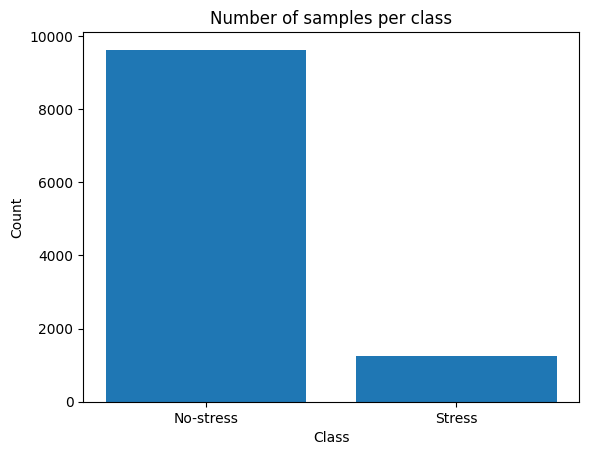

In [738]:
plot_label_distribution(sequences_df)

In [739]:
# Filter out rows with ID S16 and S17
test_df = sequences_df[(sequences_df['ID'] == 'S16') | (sequences_df['ID'] == 'S17')]

# Drop the filtered rows from the original DataFrame
sequences_df = sequences_df.drop(test_df.index)

# Reset index for both DataFrames
test_df.reset_index(drop=True, inplace=True)
sequences_df.reset_index(drop=True, inplace=True)

In [740]:
test_subject_1 = test_df[test_df['ID'] == 'S16']
test_subject_2 = test_df[test_df['ID'] == 'S17']


****Scale and split data****

We perform a simple Min-Max scaling to bring the value-range between 0 and 1.

In [741]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def scale_and_flatten(series_list):
    scaler = MinMaxScaler()
    return [scaler.fit_transform(np.asarray(series).reshape(-1, 1)).flatten() for series in series_list]

# Scale and flatten the 'w_eda' feature
eda_array_list = scale_and_flatten(sequences_df[METRIC])
test_array_list_subject_1 = scale_and_flatten(test_subject_1[METRIC])
test_array_list_subject_2 = scale_and_flatten(test_subject_2[METRIC])

# Extract labels and convert to numpy arrays
labels_array = np.array(sequences_df['downsampled_label'])
validation_labels_array_subject_1 = np.array(test_subject_1['downsampled_label'])
validation_labels_array_subject_2 = np.array(test_subject_2['downsampled_label'])

# Print counts
print(f"EDA list Count: {len(eda_array_list)}")
print(f"Labels list Count: {len(labels_array)}")
print(f"\nTest set 1: \nEDA list Count: {len(test_array_list_subject_1)}")
print(f"Labels list Count: {len(validation_labels_array_subject_1)}")
print(f"\nTest set 2: \nEDA list Count: {len(test_array_list_subject_2)}")
print(f"Labels list Count: {len(validation_labels_array_subject_2)}")


EDA list Count: 9420
Labels list Count: 9420

Test set 1: 
EDA list Count: 704
Labels list Count: 704

Test set 2: 
EDA list Count: 740
Labels list Count: 740


In [742]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import model_selection
from collections import Counter
from imblearn.over_sampling import SMOTE
import numpy as np
import tensorflow.keras as keras

max_sequence_length = 32  # Choose the desired maximum sequence length

def pad_and_reshape(series_list, maxlen):
    padded = pad_sequences(series_list, maxlen=maxlen, dtype='float32', padding='post', truncating='post')
    reshaped = padded.reshape(-1, maxlen, 1)
    return reshaped

def apply_smote(x_train, y_train):
    x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
    smote = SMOTE(random_state=42)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_reshaped, y_train)
    x_train_resampled = x_train_resampled.reshape(-1, x_train.shape[1], x_train.shape[2])
    return x_train_resampled, y_train_resampled

# Padding and reshaping sequences
series_padded = pad_and_reshape(eda_array_list, max_sequence_length)
x_test_subject_1_padded = pad_and_reshape(test_array_list_subject_1, max_sequence_length)
x_test_subject_2_padded = pad_and_reshape(test_array_list_subject_2, max_sequence_length)



# Splitting data into training and testing sets (70% train, 30% validation)
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    series_padded, labels_array, test_size=0.40, random_state=42, shuffle=True
)

# Converting labels to numpy arrays
y_train = np.asarray(y_train).astype(np.float32)
y_test_subject_1 = np.asarray(validation_labels_array_subject_1).astype(np.float32)
y_test_subject_2 = np.asarray(validation_labels_array_subject_2).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

# Check lengths of train, validation, and test sets
print(
    f"Length of x_train : {len(x_train)}\nLength of x_test_subject_1 : {len(x_test_subject_1_padded)}\nLength of x_test_subject_2 : {len(x_test_subject_2_padded)}\nLength of x_test : {len(x_val)}\n"
    f"Length of y_train : {len(y_train)}\nLength of y_val_subject_1 : {len(y_test_subject_1)}\nLength of y_val_subject_2 : {len(y_test_subject_2)}\nLength of y_test : {len(y_val)}"
)

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE using the function
x_train_resampled, y_train_resampled = apply_smote(x_train, y_train)

# Check the class distribution after SMOTE
class_distribution_after = Counter(y_train_resampled)
print("Class distribution after SMOTE:", {0: class_distribution_after[0], 1: class_distribution_after[1]})

Length of x_train : 5652
Length of x_test_subject_1 : 704
Length of x_test_subject_2 : 740
Length of x_test : 3768
Length of y_train : 5652
Length of y_val_subject_1 : 704
Length of y_val_subject_2 : 740
Length of y_test : 3768
Class distribution before SMOTE: Counter({0.0: 5022, 1.0: 630})
Class distribution after SMOTE: {0: 5022, 1: 5022}


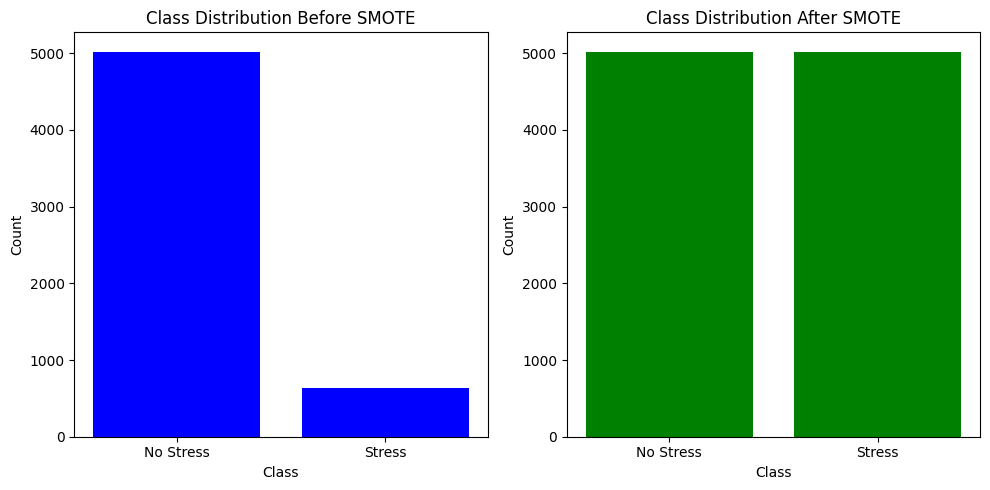

In [743]:
import matplotlib.pyplot as plt
from collections import Counter

# Class distribution before SMOTE
class_distribution_before = Counter(y_train)
# Class distribution after SMOTE
class_distribution_after = Counter(y_train_resampled)

# Define labels
labels = ['No Stress', 'Stress']

# Plotting
plt.figure(figsize=(10, 5))

# Plot before SMOTE
plt.subplot(1, 2, 1)
plt.bar(labels, class_distribution_before.values(), color='blue')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], labels)

# Plot after SMOTE
plt.subplot(1, 2, 2)
plt.bar(labels, class_distribution_after.values(), color='green')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], labels)

plt.tight_layout()
plt.show()

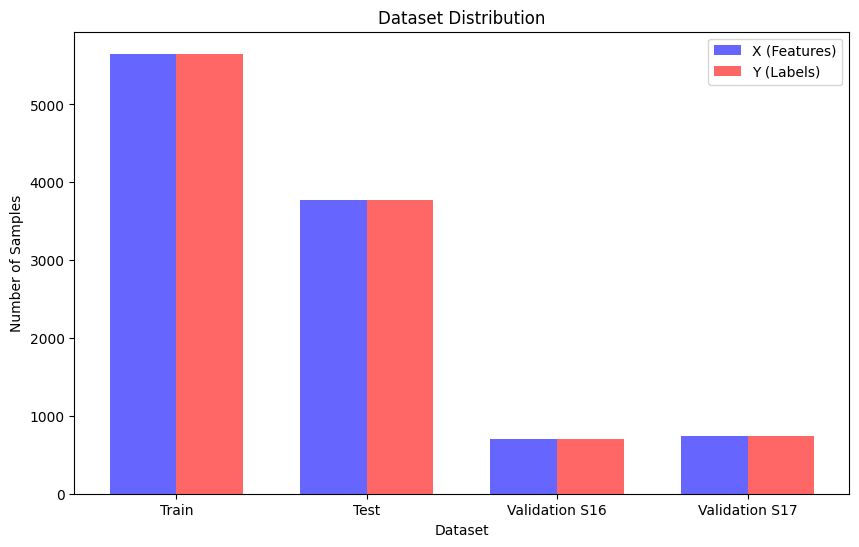

In [744]:
def plot_dataset_distribution(x_train, y_train, x_val, y_val, x_test_subject_1, y_test_subject_1, x_test_subject_2, y_test_subject_2):
    """
    Plots a bar chart showing the sizes of the train, validation, and test sets.

    Parameters:
    - x_train, y_train: Training data and labels.
    - x_test_subject_1, y_test_subject_1: Validation data and labels for subject 1.
    - x_test_subject_2, y_test_subject_2: Validation data and labels for subject 2.
    - x_val, y_val: Test data and labels.
    """
    dataset_names = ['Train', 'Test', 'Validation S16', 'Validation S17']
    x_lengths = [len(x_train), len(x_val), len(x_test_subject_1), len(x_test_subject_2)]
    y_lengths = [len(y_train), len(y_val), len(y_test_subject_1), len(y_test_subject_2)]
    
    # Plotting the bar plot
    plt.figure(figsize=(10, 6))
    
    bar_width = 0.35  # Width of the bars
    
    index = np.arange(len(dataset_names))
    
    plt.bar(index, x_lengths, bar_width, color='b', alpha=0.6, label='X (Features)')
    plt.bar(index + bar_width, y_lengths, bar_width, color='r', alpha=0.6, label='Y (Labels)')
    
    plt.xlabel('Dataset')
    plt.ylabel('Number of Samples')
    plt.title('Dataset Distribution')
    plt.xticks(index + bar_width / 2, dataset_names)
    plt.legend()
    plt.savefig("dataset_distribution.png")
    plt.show()

# Plot dataset distribution
plot_dataset_distribution(x_train, y_train, x_val, y_val, x_test_subject_1_padded, y_test_subject_1, x_test_subject_2_padded, y_test_subject_2)


In [745]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)

def SplitDatasetForFolds(train_index, test_index, fold_nr):
    print(f"Training fold {fold_nr}...")

    # Split the data into train and validation sets for this fold.
    x_train_fold = x_train[train_index]
    y_train_fold = y_train[train_index]
    x_validation_fold = x_train[test_index]
    y_validation_fold = y_train[test_index]

    # Create tf.data.Datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train_fold, y_train_fold))
    validation_dataset = tf.data.Dataset.from_tensor_slices((x_validation_fold, y_validation_fold))
    test_dataset_subject1 = tf.data.Dataset.from_tensor_slices((x_test_subject_1_padded, y_test_subject_1))
    test_dataset_subject2 = tf.data.Dataset.from_tensor_slices((x_test_subject_2_padded, y_test_subject_2))
    

    # Shuffling and batching the datasets
    train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
    validation_dataset = validation_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
    test_dataset_subject1 = test_dataset_subject1.batch(BATCH_SIZE)
    test_dataset_subject2 = test_dataset_subject2.batch(BATCH_SIZE)

    return train_dataset, validation_dataset, test_dataset_subject1, test_dataset_subject2

In [746]:
sequences_df['downsampled_label']

0       0
1       0
2       0
3       0
4       0
       ..
9415    0
9416    0
9417    0
9418    0
9419    0
Name: downsampled_label, Length: 9420, dtype: int64

In [747]:
import numpy as np

# Calculate the total number of samples
total_samples = len(sequences_df)

# Count the number of samples for each class
class_counts = sequences_df['downsampled_label'].value_counts()

# Calculate the class weights
class_weights_custom = {cls: 1 - (count / total_samples) for cls, count in class_counts.items()}
print(class_weights_custom)

{0: 0.113588110403397, 1: 0.886411889596603}


In [748]:
# Assuming your one-hot encoded labels are in a variable named 'labels'
binary_labels = np.argmax(sequences_df['downsampled_label'])
print("Shape of binary labels:", binary_labels.shape)

Shape of binary labels: ()


In [749]:
def plot_history_metrics(history_dict: dict):
    total_plots = len(history_dict)
    cols = total_plots // 2
    rows = total_plots // cols
    if total_plots % cols != 0:
        rows += 1

    pos = range(1, total_plots + 1)
    plt.figure(figsize=(15, 10))
    for i, (key, value) in enumerate(history_dict.items()):
        plt.subplot(rows, cols, pos[i])
        plt.plot(range(len(value)), value)
        plt.title(str(key))
    plt.show()

In [753]:


from tensorflow.keras import layers

def create_model():
    input_layer = keras.Input(shape=(32, 1))

    x = layers.Conv1D(
        filters=32, kernel_size=3, strides=2, activation="relu", padding="same"
    )(input_layer)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=64, kernel_size=3, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=128, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=256, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=512, kernel_size=7, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=1024,
        kernel_size=7,
        strides=2,
        activation="relu",
        padding="same",
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation="relu")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(2048, activation="relu")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    
    x = layers.Dense(128, activation="relu")(x)

    output_layer = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=input_layer, outputs=output_layer)
    
    return model



In [751]:
conv_model = create_model()
conv_model.summary()

# Save model to JSON
model_json = conv_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


Model: "functional_262"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_120 (InputLayer)    │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_393 (Conv1D)             │ (None, 64, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_393         │ (None, 64, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_394 (Conv1D)             │ (None, 32, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_394         │ (None, 32, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_395 (Conv1D)             │ (None, 16, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_395         │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_396 (Conv1D)             │ (None, 8, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_396         │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_397 (Conv1D)             │ (None, 4, 512)         │       918,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_397         │ (None, 4, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_398 (Conv1D)             │ (None, 2, 1024)        │     3,671,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_398         │ (None, 2, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_332 (Dropout)           │ (None, 2, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_120 (Flatten)           │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_347 (Dense)               │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_333 (Dropout)           │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_348 (Dense)               │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_334 (Dropout)           │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_349 (Dense)               │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_335 (Dropout)           │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_350 (Dense)               │ (None, 128)            │       131,20

 Total params: 23,821,505 (90.87 MB)

 Trainable params: 23,817,473 (90.86 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [752]:
# To store history of each fold
history_list = []
fold_number = 1

best_val_accuracy = 0
best_model_filename = ""


for train_index, test_index in kfold.split(x_train):
    # Split data into training and validation sets for this fold.
    train_dataset, validation_dataset, test_sj1, test_sj2 = SplitDatasetForFolds(train_index, test_index, fold_number)

    # Create a new model instance
    model = create_model()

    # Compile the model
    optimizer = keras.optimizers.Adam(amsgrad=True, learning_rate=0.001)
    loss = keras.losses.BinaryCrossentropy()
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=[
            keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
        ],
    )

    # Set up callbacks
    callbacks = [
        keras.callbacks.ModelCheckpoint(f"best_model_fold_{fold_number}.keras", save_best_only=True, monitor="val_binary_accuracy"),
        keras.callbacks.ReduceLROnPlateau(monitor="val_precision", factor=0.2, patience=15, min_lr=0.000001),
        # keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=10, restore_best_weights=True),
    ]

    # Train the model
    history = model.fit(
        train_dataset,
        epochs=50,
        batch_size=BATCH_SIZE,
        validation_data=validation_dataset,
        callbacks=callbacks,
        class_weight=class_weights_custom
    )

    # Append history
    history_list.append(history.history)

        # Check if this model has the best validation accuracy so far
    if history.history['val_binary_accuracy'][-1] > best_val_accuracy:
        best_val_accuracy = history.history['val_binary_accuracy'][-1]
        best_model_filename = f"best_model_fold_{fold_number}.keras"

    # loss, binary_accuracy, auc, precision, recall = model.evaluate(dataset)
    # print(f"Loss: {loss}\n Binary Accuracy: {binary_accuracy}\n AUC: {auc}\n Precision: {precision}\n Recall: {recall}\n")

    fold_number += 1
    print(f"Training fold {fold_number} completed\n")
    print("------------------------------------------------------------------------------------------------------------------\n")

print("Cross-validation training completed")

Training fold 1...
Epoch 1/50


ValueError: Input 0 of layer "functional_264" is incompatible with the layer: expected shape=(None, 128, 1), found shape=(None, 32)

In [ ]:
# Calculate mean and standard deviation for each metric
metrics_mean = {}
metrics_std = {}

for metric_name in history_list[0].keys():
    metric_values = [fold[metric_name] for fold in history_list]
    metrics_mean[metric_name] = np.mean(metric_values)
    metrics_std[metric_name] = np.std(metric_values)

# Calculate F1 score
f1_score_mean = 2 * metrics_mean['precision'] * metrics_mean['recall'] / (metrics_mean['precision'] + metrics_mean['recall'])

# Print or use the mean and standard deviation values
for metric_name in metrics_mean.keys():
    print(f"{metric_name}: Mean - {metrics_mean[metric_name]}, Std - {metrics_std[metric_name]}")

# Print or use the F1 score mean
print(f"F1 Score: Mean - {f1_score_mean}")

In [ ]:
# Load the best model
print(best_model_filename)
best_model = keras.models.load_model(best_model_filename)

# Now you have the best model, you can evaluate it on the test set
for dataset in [train_dataset, validation_dataset]:
    print("Training set" if dataset == train_dataset else "Validation set")
    loss, binary_accuracy, auc, precision, recall = best_model.evaluate(dataset)
    print(f"Loss: {loss}\n Binary Accuracy: {binary_accuracy}\n AUC: {auc}\n Precision: {precision}\n Recall: {recall}\n")


with open(f"metrics.txt", "w") as f:
    f.write(f"Loss: {loss}\n Binary Accuracy: {binary_accuracy}\n AUC: {auc}\n Precision: {precision}\n Recall: {recall}\n") 

In [ ]:
import matplotlib.pyplot as plt

# Identify the index of the best model from the filename
best_fold_index = int(best_model_filename.split('_')[-1].split('.')[0]) - 1

# Extract the history of the best model
best_model_history = history_list[best_fold_index]

final_epoch = len(best_model_history['loss']) - 1
print(f"Final epoch metrics for best model (Fold {best_fold_index + 1}) on Validation set:")
print(f"Loss: {best_model_history['loss'][final_epoch]} \nBinary Accuracy: {best_model_history['binary_accuracy'][final_epoch]} \nAUC: {best_model_history['auc'][final_epoch]} \nPrecision: {best_model_history['precision'][final_epoch]} \nRecall: {best_model_history['recall'][final_epoch]}\n")

final_epoch = len(best_model_history['loss']) - 1
print(f"Final epoch metrics for best model (Fold {best_fold_index + 1}) on Validation set:")
print(f"Loss: {best_model_history['val_loss'][final_epoch]} \nBinary Accuracy: {best_model_history['val_binary_accuracy'][final_epoch]} \nAUC: {best_model_history['val_auc'][final_epoch]} \nPrecision: {best_model_history['val_precision'][final_epoch]} \nRecall: {best_model_history['val_recall'][final_epoch]}\n")


# Plot training & validation accuracy, loss, AUC, precision, recall, and learning rate values
plt.figure(figsize=(15, 10))

# Plot training & validation accuracy values
plt.subplot(3, 2, 1)
plt.plot(best_model_history['binary_accuracy'])
plt.plot(best_model_history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(3, 2, 2)
plt.plot(best_model_history['loss'])
plt.plot(best_model_history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation AUC values
plt.subplot(3, 2, 3)
plt.plot(best_model_history['auc'])
plt.plot(best_model_history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation precision values
plt.subplot(3, 2, 4)
plt.plot(best_model_history['precision'])
plt.plot(best_model_history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation recall values
plt.subplot(3, 2, 5)
plt.plot(best_model_history['recall'])
plt.plot(best_model_history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot learning rate
plt.subplot(3, 2, 6)
if 'learning_rate' in best_model_history:
    plt.plot(best_model_history['learning_rate'])
    plt.title('Learning Rate')
    plt.ylabel('Learning Rate')
    plt.xlabel('Epoch')
else:
    plt.title('Learning Rate history not available')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix

# Generate predictions on the test set
x = x_train_resampled
y = y_train_resampled

y_pred_probs = best_model.predict(x, verbose=0)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute metrics
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_probs)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stress', 'Stress'], yticklabels=['No Stress', 'Stress'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define a color scheme for metrics
colors = ['b', 'g', 'r', 'y', 'k']

# Plotting the metrics for all folds
def plot_metrics(history_list, metrics, val_metrics, colors):
    num_metrics = len(metrics)
    fig, axs = plt.subplots(nrows=num_metrics, ncols=2, figsize=(28, 20))
    for i, (metric, val_metric) in enumerate(zip(metrics, val_metrics)):
        train_max = max([max(history[metric]) for history in history_list])
        val_max = max([max(history[val_metric]) for history in history_list])
        y_max = max(train_max, val_max)
        for j, history in enumerate(history_list):
            color_index = j % len(colors)  # Get color index for this fold
            color = colors[color_index]     # Get color for this fold
            axs[i, 0].plot(history[metric], label=f'Fold {j+1} {metric}', color=color)
            axs[i, 1].plot(history[val_metric], label=f'Fold {j+1} {val_metric}', linestyle='--', color=color)
        axs[i, 0].set_title(f'{metric.capitalize()} over Folds')
        axs[i, 0].set_xlabel('Epochs')
        axs[i, 0].set_ylabel(metric)
        axs[i, 0].legend()
        axs[i, 0].grid()
        axs[i, 0].set_ylim([0, y_max])  # Set y-axis limit for training plot
        
        axs[i, 1].set_title(f'{val_metric.capitalize()} over Folds')
        axs[i, 1].set_xlabel('Epochs')
        axs[i, 1].set_ylabel(val_metric)
        axs[i, 1].legend()
        axs[i, 1].grid()
        axs[i, 1].set_ylim([0, y_max])  # Set y-axis limit for validation plot
        
    plt.tight_layout()
    plt.savefig('folds.png')
    plt.show()

# Updated metrics list based on the actual keys from the history dictionary
metrics = ['binary_accuracy', 'loss', 'auc', 'precision', 'recall']
val_metrics = ['val_binary_accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall']

# Plot metrics
plot_metrics(history_list, metrics, val_metrics, colors)


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(best_model, x_val, y_val, subject_label):
    # Generate predictions on the validation set
    y_pred_probs = best_model.predict(x_val, verbose=0)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    print(f"Confusion Matrix for {subject_label}:")
    print(conf_matrix)

    # Compute metrics
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_probs)
    f1 = f1_score(y_val, y_pred)

    print(f"Metrics for {subject_label}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"f1-score: {f1}")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stress', 'Stress'], yticklabels=['No Stress', 'Stress'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {subject_label}')
    plt.savefig(f'model_results_{subject_label}.png', dpi=120)
    plt.show()

    return y_pred_probs

# Evaluate for subject S16
y_pred_probs = evaluate_model(best_model, x_test_subject_1_padded, y_test_subject_1, 'S16')

# Evaluate for subject S17
evaluate_model(best_model, x_test_subject_2_padded, y_test_subject_2, 'S17')


In [ ]:
y_pred_probs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
scaler = MinMaxScaler()

def view_evaluated_eeg_plots(model, sequences_df, scaler):
    def plot_signals(data, labels, predictions, ids, times):
        total_plots = len(data)
        cols = total_plots // 5
        rows = total_plots // cols
        if total_plots % cols != 0:
            rows += 1
        pos = range(1, total_plots + 1)
        fig = plt.figure(figsize=(40, 30))
        for i, (plot_data, og_label, pred_label, id_, time) in enumerate(zip(data, labels, predictions, ids, times)):
            plt.subplot(rows, cols, pos[i])
            plt.plot(time, plot_data)
            plt.title(f"ID: {id_}\nActual Label: {og_label}\nPredicted Label: {pred_label}")
            fig.subplots_adjust(hspace=0.5)
        plt.show()

    def generate_signals_for_label(label, num_signals=25):
        filtered_df = sequences_df[sequences_df['downsampled_label'] == label]
        sampled_df = filtered_df.sample(n=num_signals, random_state=42)
        data = sampled_df['w_eda']
        times = sampled_df['Time']
        data_array = [scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in data]
        data_array = np.asarray(data_array).astype(np.float32).reshape(-1, 32, 1)
        labels = sampled_df['downsampled_label'].tolist()
        ids = sampled_df['ID'].tolist()  # Extract IDs
        predictions = (model.predict(data_array, verbose=0) > 0.5).astype(int).flatten()
        return data, labels, predictions, ids, times

    data_0, labels_0, predictions_0, ids_0, times_0 = generate_signals_for_label(0)
    data_1, labels_1, predictions_1, ids_1, times_1 = generate_signals_for_label(1)
    
    print("Plotting signals with label 0:")
    plot_signals(data_0, labels_0, predictions_0, ids_0, times_0)
    
    print("Plotting signals with label 1:")
    plot_signals(data_1, labels_1, predictions_1, ids_1, times_1)

# Call the function with the required arguments
view_evaluated_eeg_plots(best_model, sequences_df, scaler)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def view_evaluated_eeg_plots(model, sequences_df, scaler, target_id):
    def plot_signals(data, labels, predictions, ids, times):
        total_plots = len(data)
        cols = total_plots // 5
        rows = total_plots // cols
        if total_plots % cols != 0:
            rows += 1
        fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
        for i, (plot_data, og_label, pred_label, id_, time) in enumerate(zip(data, labels, predictions, ids, times)):
            if len(plot_data) == 0:  # Skip empty plots
                continue
            ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
            color = 'green' if og_label == pred_label else 'red'
            ax.plot(time, plot_data, color=color)
            ax.set_title(f"ID: {id_}\nActual Label: {og_label}\nPredicted Label: {pred_label}")
            ax.set_xlabel('Time')
            ax.set_ylabel('Data')
        plt.tight_layout()
        plt.show()

    def generate_signals_for_id(target_id):
        filtered_df = sequences_df[sequences_df['ID'] == target_id]
        filtered_df = filtered_df.sort_values(by='Time')  # Sort by time
        data = filtered_df['w_eda']
        times = filtered_df['Time']
        data_array = [scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in data]
        data_array = np.asarray(data_array).astype(np.float32).reshape(-1, 32, 1)
        labels = filtered_df['downsampled_label'].tolist()
        ids = filtered_df['ID'].tolist()  # Extract IDs
        predictions = (model.predict(data_array, verbose=0) > 0.5).astype(int).flatten()
        return data, labels, predictions, ids, times

    data, labels, predictions, ids, times = generate_signals_for_id(target_id)
    
    print(f"Plotting signals for ID: {target_id}")
    plot_signals(data, labels, predictions, ids, times)

    # Create confusion matrix
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function with the required arguments
view_evaluated_eeg_plots(best_model, test_df, scaler, target_id='S16')
